In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [2]:
def load_data():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])
    
    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) 
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])
    
    train_set_y_orig = train_set_y_orig.reshape((1,train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1,test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig

In [3]:
#Load dataset
train_x, train_y, test_x, test_y = load_data()

train_x = train_x.reshape(train_x.shape[0],-1).T
test_x = test_x.reshape(test_x.shape[0],-1).T
train_x = train_x/255.0
test_x = test_x/255.0

In [4]:
def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    assert(A.shape == Z.shape)
    return A

def relu(Z):
    A = np.maximum(0,Z)
    assert(A.shape == Z.shape)
    return A

def relu_derivative(dA, Z):
    dZ = np.array(dA, copy=True) 
    dZ[Z <= 0] = 0
    assert(dA.shape==Z.shape)
    return dZ

def sigmoid_derivative(dA, Z):
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    assert (dZ.shape == Z.shape)
    return dZ

def initialize_parameters(layer_sizes):
    biases=[]
    weights=[]
    for l in range(1,len(layer_sizes)):
        biases.append(np.random.rand(layer_sizes[l],1)*0.01)
        weights.append(np.random.rand(layer_sizes[l],layer_sizes[l-1])*0.01)
    return weights, biases

def forward_prop(X, weights, biases):
    
    Z_values=[]
    A_values=[X]
    for l in range(0,len(weights)-1):
        Z=np.dot(weights[l],A_values[l])+biases[l]
#         print(Z.shape)
        Z_values.append(Z)
        A = relu(Z)
        A_values.append(A)
    ZL= np.dot(weights[len(weights)-1],A)+biases[len(weights)-1] 
    
    Z_values.append(ZL)
    AL=sigmoid(ZL)
    A_values.append(AL)
#     print(AL)
    return AL, Z_values, A_values
        
def calculate_cost(A, y):
    m= y.shape[1]
#     print(y.shape, A.shape)
    cost= (1./m) * np.sum(-np.multiply(y,np.log(A)) - np.multiply(1-y, np.log(1-A)))
    return cost

def backward_prop(AL,Y, Z_values, A_values,weights):
#     print("len weights",len(weights))
#     print("len zvalues",len(Z_values))
    L=len(Z_values)
#     print(L)
#     print(AL.shape, Y.shape)
    m=Y.shape[1]
    grads_weights=[]
    grads_biases=[]
    
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
#     print(dAL.shape)
#     print("Z_value[L-1]", Z_values[L-1].shape)
    dZ = sigmoid_derivative(dAL,Z_values[L-1])
#     print("dZ", dZ.shape)
#     print("A_value[L-2]", A_values[L-1].shape)
    dW = 1./m * np.dot(dZ,A_values[L-1].T)
#     print("dW",dW.shape)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
#     print("dB",db.shape)
    grads_weights.insert(0,dW)
    grads_biases.insert(0,db)
    
    for l in reversed(range(L-1)):
#         print(l)
#         print("weights[0]",(weights[l].shape))
        dA = np.dot(weights[l+1].T,dZ)
        dZ = relu_derivative(dA,Z_values[l])
        dW = 1./m * np.dot(dZ,A_values[l].T)
        db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
        grads_weights.insert(0,dW)
        grads_biases.insert(0,db)
    return (grads_weights, grads_biases)
        
def gradient_descent(learning_rate, grads_weights, grads_biases, weights, biases):
    for l in range(len(weights)):
        weights[l] = weights[l]- learning_rate*grads_weights[l]
        biases[l]= biases[l]- learning_rate*grads_biases[l]
    return weights,biases

Cost after iteration 0: 1.517028914512074
Cost after iteration 100: 0.5931158092813792
Cost after iteration 200: 0.5158977279375716
Cost after iteration 300: 0.435205756622767
Cost after iteration 400: 0.3703180212645484
Cost after iteration 500: 0.2398907424130556
Cost after iteration 600: 0.36263185387807423
Cost after iteration 700: 0.24052982351335894
Cost after iteration 800: 0.14025720978795717
Cost after iteration 900: 0.2401922240173388
Cost after iteration 1000: 0.048112981436458604
Cost after iteration 1100: 0.02574303083791793
Cost after iteration 1200: 0.017146767317167144
Cost after iteration 1300: 0.013009024943551818
Cost after iteration 1400: 0.010574771910110053
Cost after iteration 1500: 0.00900559934688162
Cost after iteration 1600: 0.007900381647634964
Cost after iteration 1700: 0.0070227263189911035
Cost after iteration 1800: 0.006414313970259957
Cost after iteration 1900: 0.005945529008561783
Cost after iteration 2000: 0.005634319997118792
Cost after iteration 210

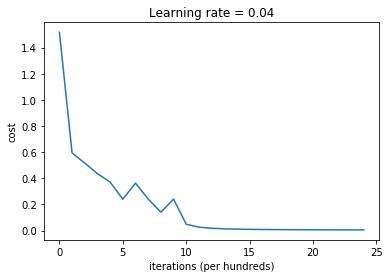

In [5]:
def model(X, Y, layers_dims, learning_rate = 0.01, num_iterations = 1000, print_cost=True):
    costs=[]
    weights, biases = initialize_parameters(layers_dims)

    for i in range(num_iterations):
        AL, Z_values, A_values = forward_prop(X, weights, biases) 

        cost = calculate_cost(AL, Y)

        grads_weights, grads_biases = backward_prop(AL, Y, Z_values, A_values, weights) 
        
        weights, biases = gradient_descent(learning_rate, grads_weights, grads_biases, weights, biases)


        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration "+str(i)+": "+str(cost))
            costs.append(cost)
        
    # plot the cost
    if print_cost:
        plt.plot(costs)
        plt.ylabel('cost')
        plt.xlabel('iterations (per hundreds)')
        plt.title("Learning rate = " + str(learning_rate))
        plt.show()
    return weights, biases
        
weights, biases = model(train_x, train_y, [12288,20,1], learning_rate = 0.04, num_iterations=2500)



In [9]:
def predict(X, y, weights, biases):
    m = X.shape[1]
    p = np.zeros((1,m), dtype=int)
    
    A, _, _ = forward_prop(X,  weights, biases)

    for i in range(0, A.shape[1]):
        if A[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    #print results
    print ("predictions: " + str(p))
    print ("true labels: " + str(y))
    print("Accuracy: "  + str(np.sum((p == y)/m)))

In [11]:
predict(train_x, train_y, weights, biases)

predictions: [[0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0
  0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1
  1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0
  1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1
  0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]]
true labels: [[0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0
  0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1
  1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0
  1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1
  0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]]
Accuracy: 0.9999999999999998


In [12]:
predict(test_x, test_y, weights, biases)

predictions: [[1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 0
  0 1 0 0 0 0 1 0 1 1 0 1 1 0]]
true labels: [[1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0
  0 1 0 0 1 1 1 0 0 0 1 1 1 0]]
Accuracy: 0.7
